In [662]:
import pandas as pd
import numpy as np
R1_data= pd.read_csv('R1.csv')
R1_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
R1_data=R1_data.dropna()
Time=R1_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
R1_data['Date'] = Date.tolist()
R1_data=R1_data.set_index('Date')
R1_data.drop('Time',axis = 1, inplace = True)
R1_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH
Date,,,,,,
2019-10-02 13:00:00,37.606508,61.467964,16.945596,31.358817,30.55,44.88
2019-10-02 14:00:00,37.606508,61.467964,22.114387,45.218727,28.72,56.78
2019-10-02 15:00:00,8.507763,42.813486,22.611759,61.807504,27.38,57.16
2019-10-02 16:00:00,8.507763,42.813486,19.652068,41.656351,26.31,58.61
2019-10-02 17:00:00,8.507763,42.813486,17.954197,30.121207,28.52,50.16


In [663]:
import pandas as pd
import numpy as np
N3_data= pd.read_csv('N3.csv')
N3_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
N3_data=N3_data.dropna()
Time=N3_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
N3_data['Date'] = Date.tolist()
N3_data=N3_data.set_index('Date')
N3_data.drop('Time',axis = 1, inplace = True)
N3_data.tail()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH
Date,,,,,,
2020-11-09 19:00:00,15.255277,59.432720,34.47053,112.54680,13.66,84.61
2020-11-09 20:00:00,13.595549,49.218701,51.01247,185.77910,13.35,85.21
2020-11-09 21:00:00,15.531131,47.994590,50.29734,152.05290,13.12,85.77
2020-11-09 22:00:00,12.958598,38.296699,48.03581,122.83820,13.02,85.93
2020-11-09 23:00:00,12.374930,35.061428,41.15864,94.77707,12.66,86.06


In [664]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

# RF

## PM2.5

## OPC

In [665]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=R1_data[['Sen_10']]
y=R1_data['Ref_10']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)

In [666]:
X_train.shape

(2479, 1)

In [667]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators =500 ,min_samples_split=2,min_samples_leaf= 2,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=True)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train) 

In [668]:
pred = regressor.predict(X_test)
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(0.38, 0.55)

In [669]:
Pearson_1,Pearson_2

(0.8, 0.74)

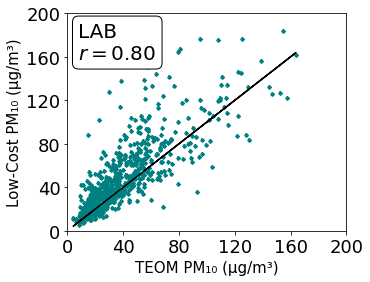

In [670]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Low-Cost PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.savefig("R1_10_OPC.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [671]:
max(np.array(lab1)),max(np.array(y_test))

(184.08615397443, 163.854456666667)

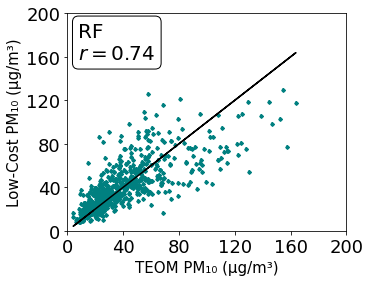

In [672]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Low-Cost PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_O.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## OPC+T

In [673]:
X=R1_data[['Sen_10','T']]
y=R1_data['Ref_10']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
regressor=regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(0.34, 0.65)

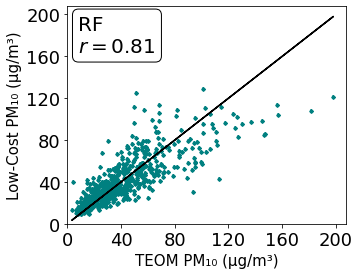

In [674]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Low-Cost PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_OT.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## OPC+RH

In [675]:
X=R1_data[['Sen_10','RH']]
y=R1_data['Ref_10']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
regressor=regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(0.36, 0.63)

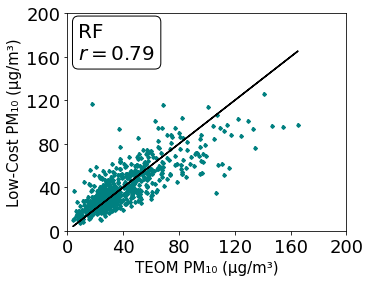

In [676]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Low-Cost PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_ORH.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## OPC+T+RH

In [677]:
X=R1_data[['Sen_10','T','RH']]
y=R1_data['Ref_10']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
regressor=regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(0.42, 0.66)

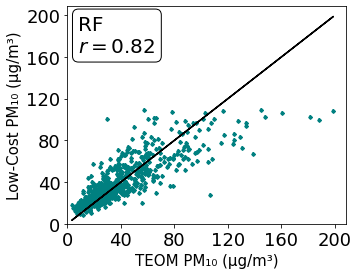

In [678]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Low-Cost PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_OTRH.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Feature Importance

In [679]:
FI=regressor.feature_importances_
FI=np.round(FI*100)
FI

array([75., 12., 12.])

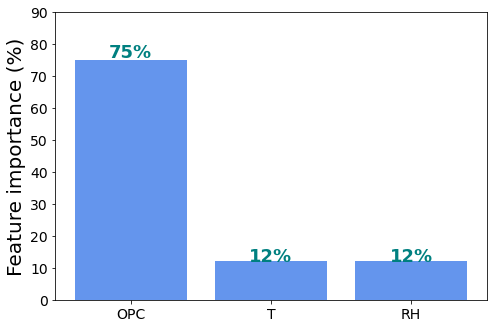

In [680]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['OPC', 'T', 'RH']
students = [int(FI[0]),int(FI[1]),int(FI[2])]
graph=ax.bar(langs,students, color='#6495ED')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,100, step=10))
plt.ylabel('Feature importance (%)', fontsize=20)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("R1_10_FI.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [681]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (3,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 6)                 24        
_________________________________________________________________
dense_121 (Dense)            (None, 128)               896       
_________________________________________________________________
dense_122 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_123 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 101       
Total params: 30,433
Trainable params: 30,433
Non-trainable params: 0
_________________________________________________________________


scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

In [682]:
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(0.42, 0.66)

In [683]:
Pearson_1,Pearson_2

(0.82, 0.82)